In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from pandas.plotting import scatter_matrix

!pip install fasteda -q

from fasteda import fast_eda

## EDA

In [19]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [20]:
print(iris.feature_names)
print(iris.data.shape)
print(iris.target_names)
print(iris.DESCR)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)
['setosa' 'versicolor' 'virginica']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.94

In [21]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] =  iris.target

DataFrame Head:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


DataFrame Tail:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(150, 5)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
----------------------------------------------------------------------------------------------------
Describe DataFrame:



,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
sepal length (cm),150,5.843,5.8,0.828,4.3,5.1,5.8,6.4,7.9,0.311753,-0.573568
sepal width (cm),150,3.057,3,0.436,2,2.8,3,3.3,4.4,0.315767,0.180976
petal length (cm),150,3.758,4.35,1.765,1,1.6,4.35,5.1,6.9,-0.272128,-1.395536
petal width (cm),150,1.199,1.3,0.762,0.1,0.3,1.3,1.8,2.5,-0.101934,-1.336067
target,150,1,1,0.819,0,0,1,2,2,0.000000,-1.500000


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



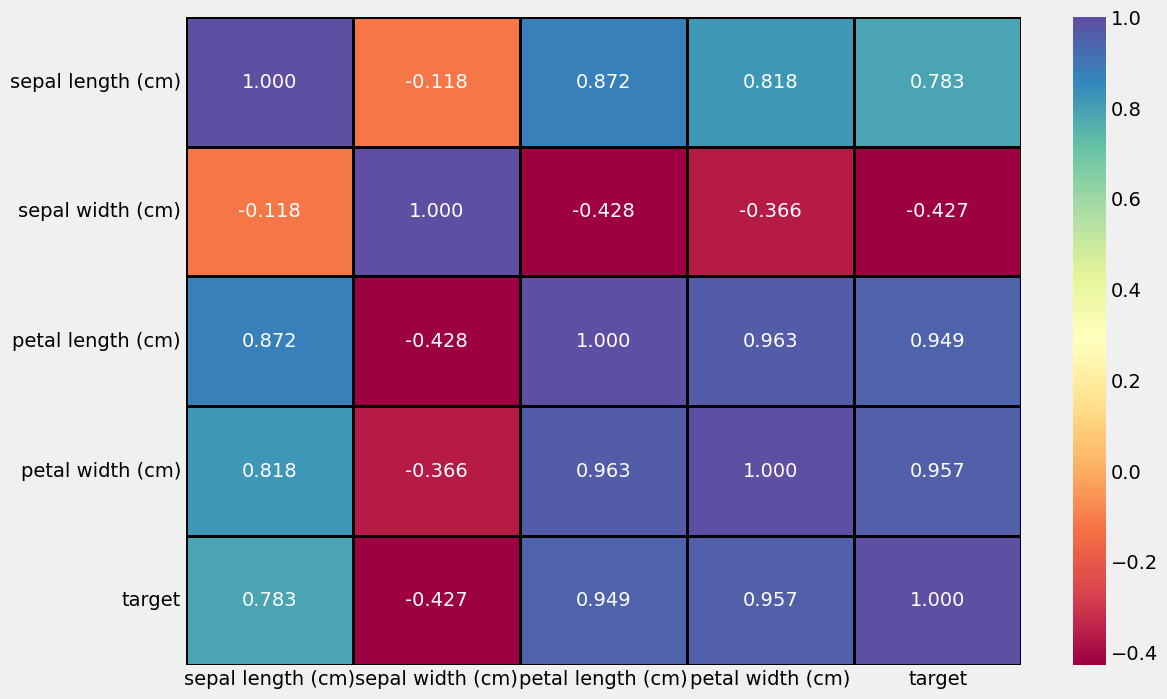

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



/home/mchiuminatto/work/dev/machine-learning/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


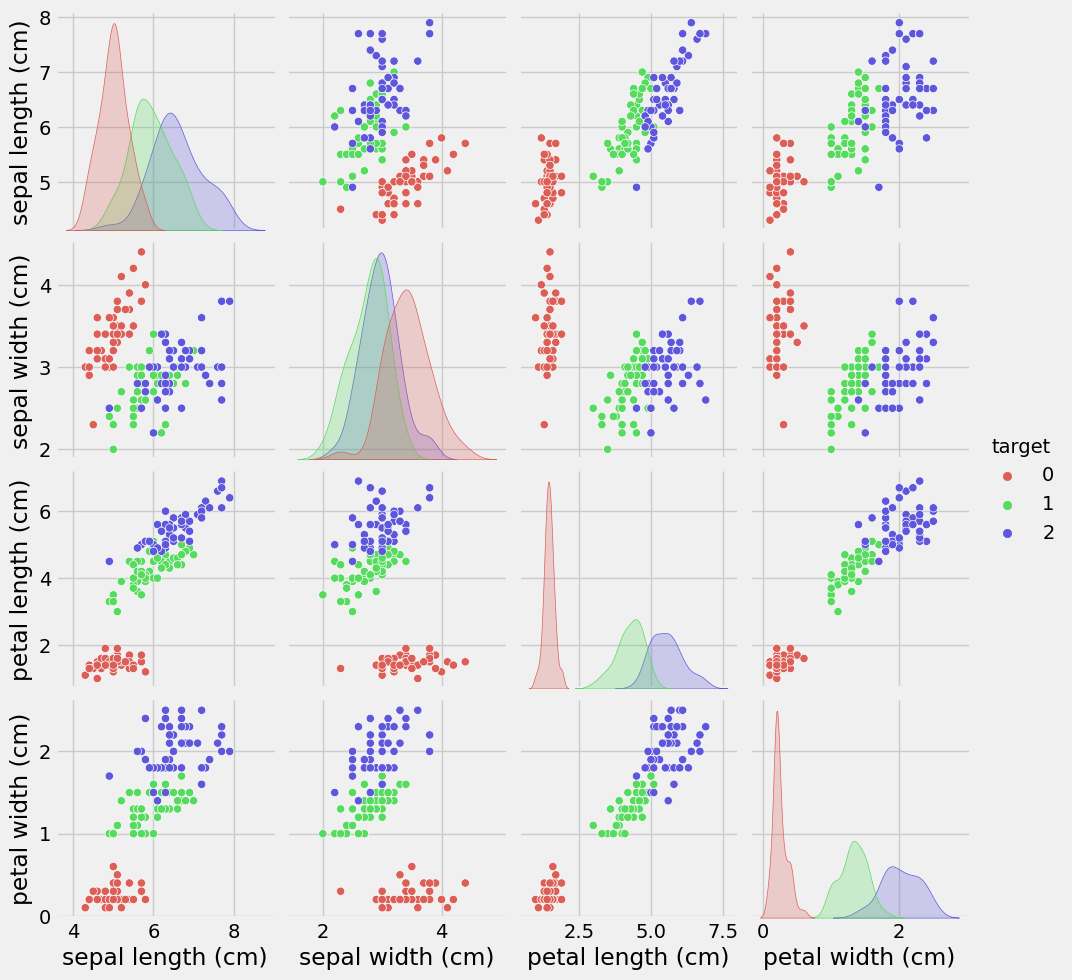

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



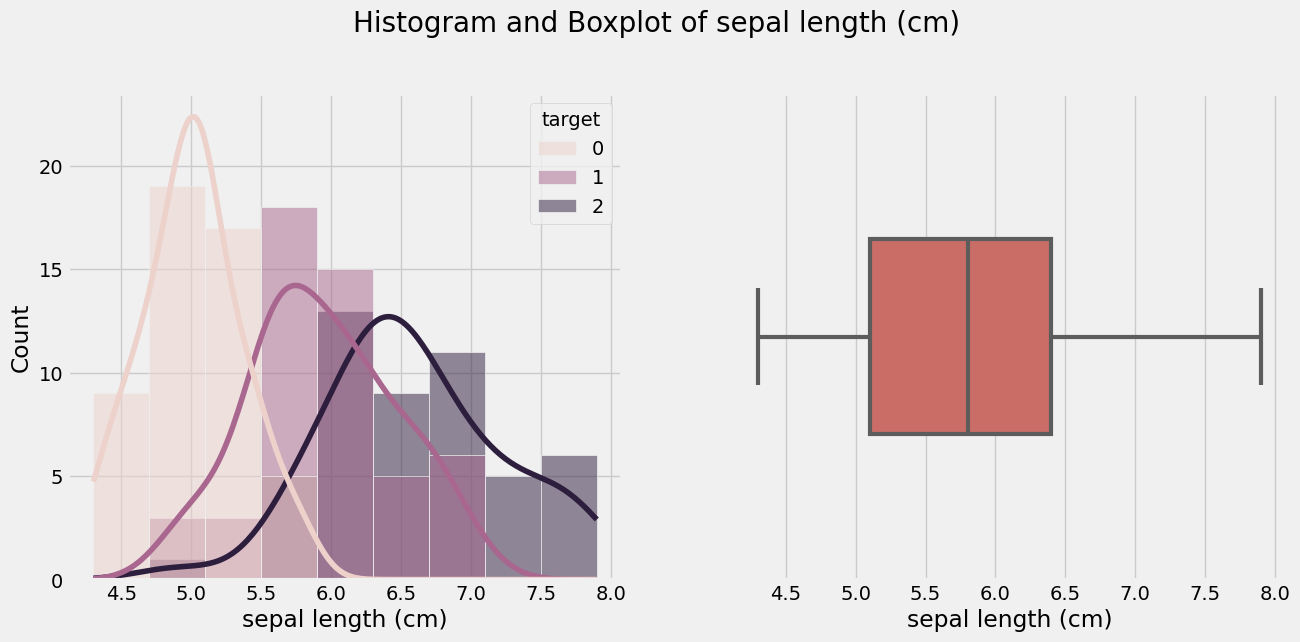

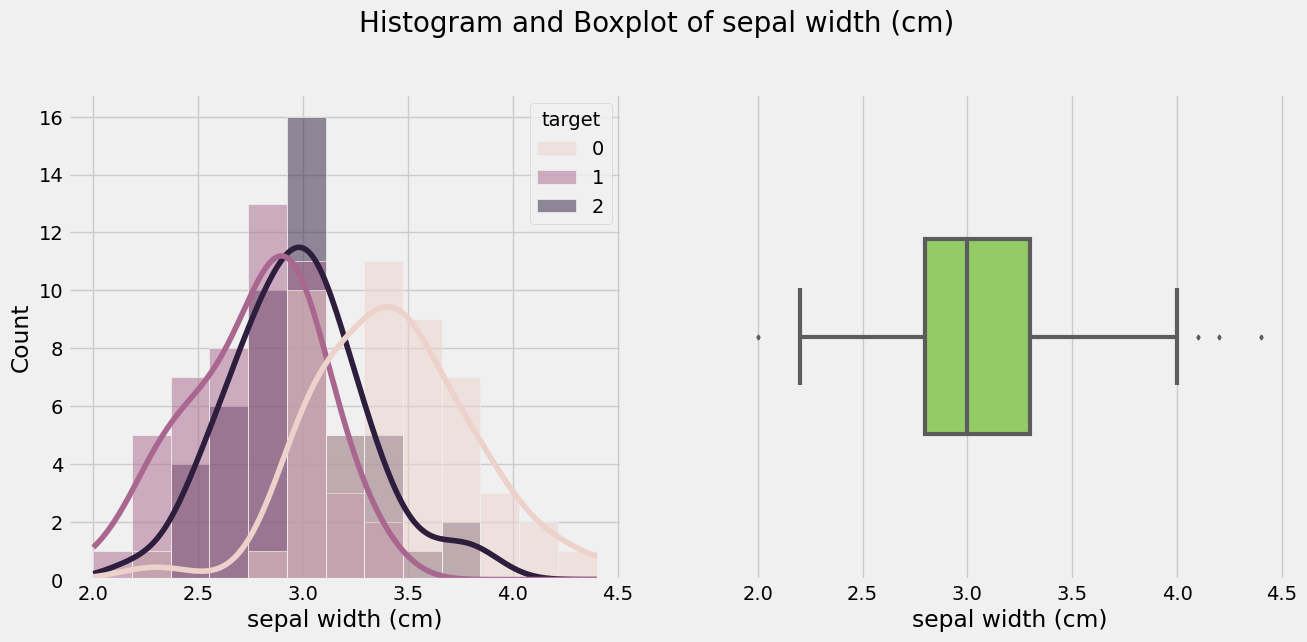

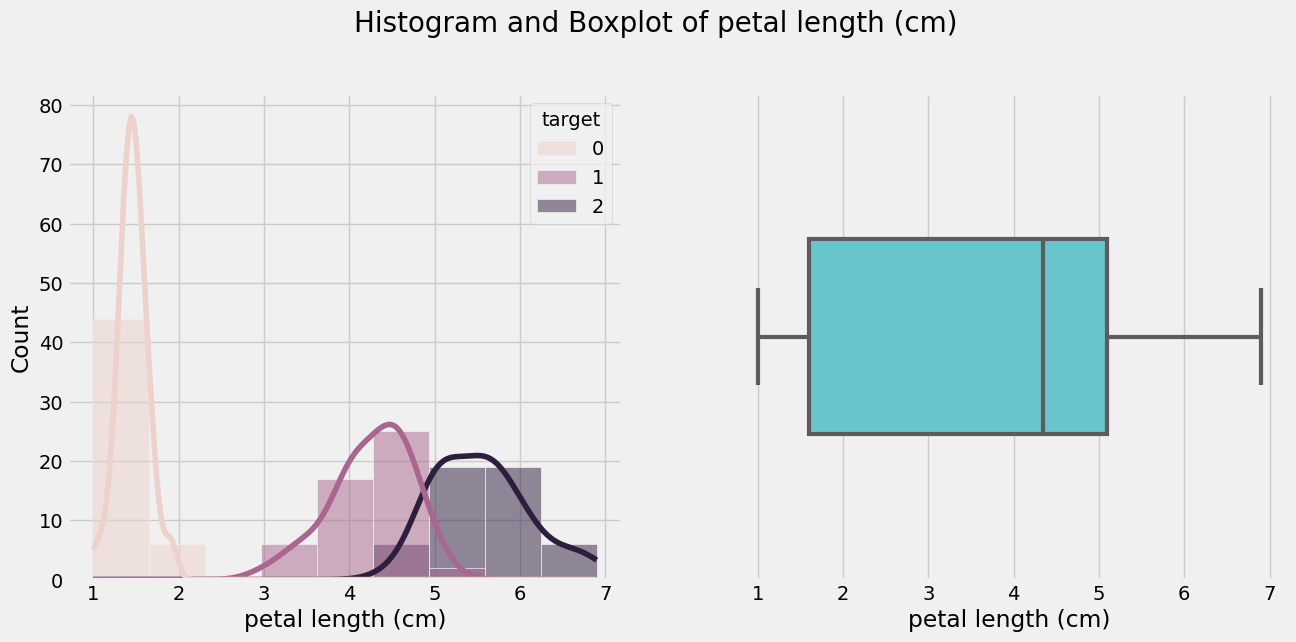

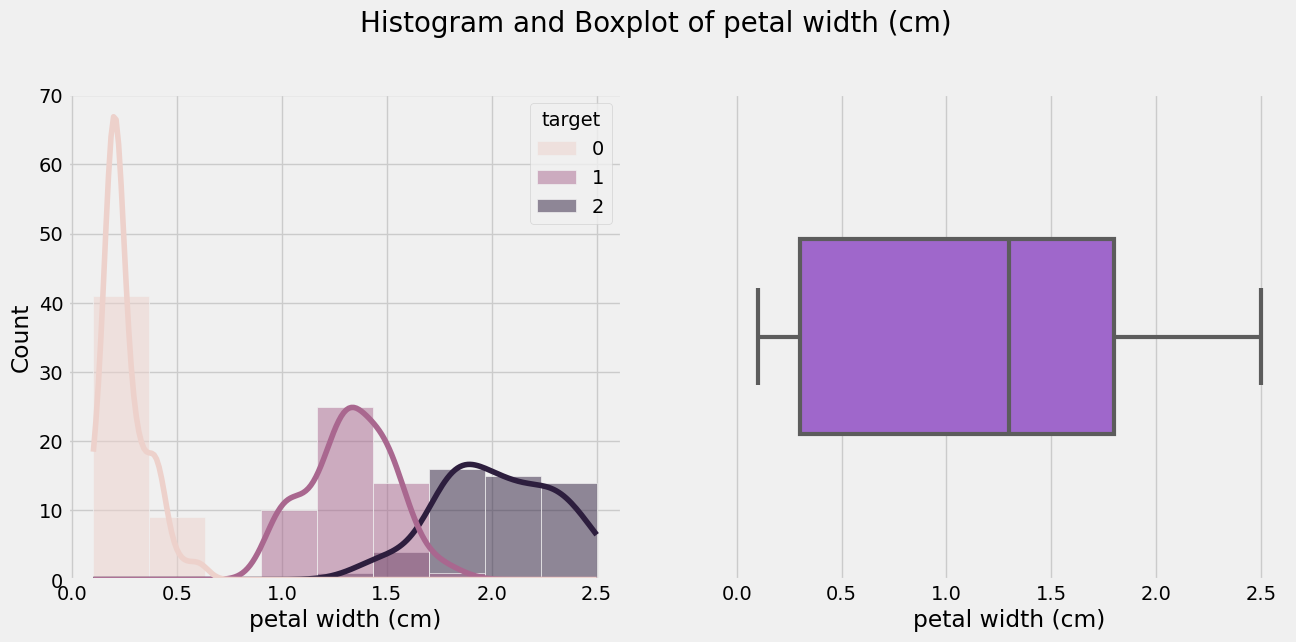

----------------------------------------------------------------------------------------------------
Countplot(s):



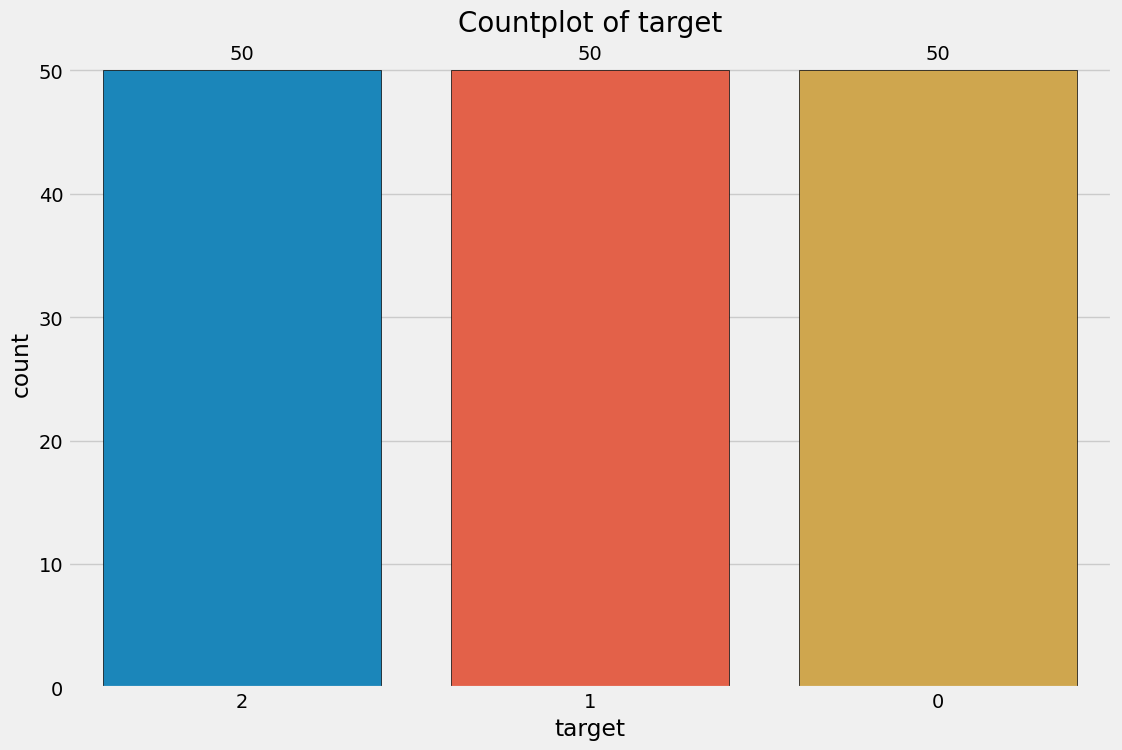

In [22]:
fast_eda(df, target="target")

## Define the Problem

Given the features, it is necessary to build a classifier that identifies each instance as:
- Iris-Setosa (0)
- Iris-Versicolour (1)
- Iris-Virginica (2)

The constraint is thta the algorithm needs to be a Softmax Grdient Descent

## Prepare Data

In [23]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Split train/test

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = np.array(df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]])
y = np.array(df["target"])

### Split Train/Test

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)
y_train = y_train.reshape(-1)  # make y_train a column vector
y_test = y_test.reshape(-1)  # make y_train a column vector
assert X_train.shape[0] == int(150*.6)
assert X_test.shape[0] == int(150*.4)

In [27]:
# check that data was shuffled apending column y_train to X-train
np.append( X_train, y_train.reshape(-1,1), axis=1)[0:10]

array([[6.3, 2.7, 4.9, 1.8, 2. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [5.6, 2.7, 4.2, 1.3, 1. ],
       [5.1, 3.4, 1.5, 0.2, 0. ],
       [5.7, 3. , 4.2, 1.2, 1. ],
       [7.7, 3.8, 6.7, 2.2, 2. ],
       [4.6, 3.2, 1.4, 0.2, 0. ],
       [6.2, 2.9, 4.3, 1.3, 1. ]])

### Add bias term to X_train

The bias term is added to train and test?

In [28]:
bias = np.ones( (X_train.shape[0], 1))
X_train_bias = np.append(bias, X_train, axis=1)

In [29]:
X_train_bias[0:10]

array([[1. , 6.3, 2.7, 4.9, 1.8],
       [1. , 4.8, 3.4, 1.9, 0.2],
       [1. , 5. , 3. , 1.6, 0.2],
       [1. , 5.1, 3.3, 1.7, 0.5],
       [1. , 5.6, 2.7, 4.2, 1.3],
       [1. , 5.1, 3.4, 1.5, 0.2],
       [1. , 5.7, 3. , 4.2, 1.2],
       [1. , 7.7, 3.8, 6.7, 2.2],
       [1. , 4.6, 3.2, 1.4, 0.2],
       [1. , 6.2, 2.9, 4.3, 1.3]])

### Create parameter matrix

In [30]:
theta = np.random.randn(3, X_train_bias.shape[1])
theta

array([[-1.14892986, -0.22966612,  1.15212631,  0.03042651,  1.13641565],
       [-0.56208177, -0.09340346, -0.06944148, -1.09290269,  1.94729388],
       [-1.04894294, -1.35636878, -0.1633496 ,  0.29739451,  1.10740315]])

In [31]:
print("Shape of X_train_bias", X_train_bias.shape)
print("Shape of theta", theta.shape)

Shape of X_train_bias (90, 5)
Shape of theta (3, 5)


## Train

$\Large \frac{\partial}{\partial\theta_i}=\frac{2}{m}\sum\limits_{i=1}^m(\theta^Tx^{(i)}-y^{(i)})x_j$

```python

m = number of samples
n = number of features
initialize(theta)

for k in epochs:
    # calculate gradient for each parameter
    for i in len(samples):<br>
       h(theta) = \theta . x_i
       squared_sum += (h(theta) - y_i)^2x_j^()
    MSE = (1/m)*squared_sum

    

```

In [32]:
np.dot(X_train_bias, theta[0]) - y_train

array([ 0.70955268,  1.95099572,  1.43508402,  2.10172264,  1.28081259,
        1.86992528,  1.4898423 ,  2.16469303,  1.75129043,  1.37648083,
        0.84725287,  2.69671723,  1.12104776,  0.94411261,  0.26587299,
        1.90879479,  2.12242879,  0.83684337,  2.61045703,  0.58945318,
        0.81239824,  1.77463661,  1.65333868,  0.71868757,  1.85272521,
        1.57022061,  1.62753306,  1.89289189,  2.46571343,  2.37443963,
        0.90142544,  1.7403652 ,  1.55725469,  0.20700557,  1.33837764,
        1.06726863,  1.45158576,  1.46699548, -0.13549268,  1.11238549,
        1.63912045,  2.09573682,  1.56375574,  1.13820273,  2.21918904,
        2.09535725,  1.29953811,  2.22978858,  1.72528116,  1.52525961,
        1.42877944,  0.84468927,  1.66419799,  1.84302765,  2.33381845,
        1.38874148,  1.78483377,  1.24566843,  0.78041009,  1.47719265,
        1.63742959,  0.84794227,  1.29374233,  1.0810103 ,  2.16962995,
        1.62340783,  0.75290894,  1.67422792,  2.4428463 ,  0.72

In [33]:
theta[0]*X_train_bias[0]

array([-1.14892986, -1.44689656,  3.11074104,  0.1490899 ,  2.04554816])

In [34]:
print("Shape X_train_bias", X_train_bias.shape)
m = X_train_bias.shape[0]
theta_this = np.matmul( (2/m)*(X_train_bias.T), np.dot(X_train_bias, theta.T) - y_train)  # calculate gradient
theta_this

Shape X_train_bias (90, 5)


ValueError: operands could not be broadcast together with shapes (90,3) (90,) 

In [35]:
fact_1 = ((2/m)*(X_train_bias.T))
print("Shape fact_1", fact_1.shape)

Shape fact_1 (5, 90)


In [36]:
fact_2 = (np.dot(X_train_bias, theta.T) - y_train)
print("Shape fact_2", fact_2.shape)

ValueError: operands could not be broadcast together with shapes (90,3) (90,) 

In [37]:
y_train

array([2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0,
       0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1,
       2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 2])

In [38]:
y_train.reshape(-1,1)

array([[2],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [2],
       [0],
       [1],
       [2],
       [0],
       [2],
       [2],
       [1],
       [1],
       [2],
       [1],
       [0],
       [1],
       [2],
       [0],
       [0],
       [1],
       [1],
       [0],
       [2],
       [0],
       [0],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [0],
       [0],
       [2],
       [2],
       [0],
       [0],
       [0],
       [1],
       [2],
       [0],
       [2],
       [2],
       [0],
       [1],
       [1],
       [2],
       [1],
       [2],
       [0],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [2],
       [2],
       [0],
       [1],
       [2],
       [2],
       [0],
       [2],
       [0],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [2],
    